In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
import arff

# Helper functions

In [2]:
def read_data(file_name):
    with open(file_name, "r") as f:
        DATA_PATH = f.readline().split("=")[1].strip()
        SEP = f.readline().split("=")[1].strip()
        TARGET_COL = f.readline().split("=")[1].strip()
        train_name = f.readline().split("=")[1].strip()
        test_name = f.readline().split("=")[1].strip()
    
    train_df = pd.read_csv(f"{DATA_PATH}/{train_name}", sep=SEP)
    test_df = pd.read_csv(f"{DATA_PATH}/{test_name}", sep=SEP)

    return train_df.append(test_df, ignore_index=True, sort=False)

# Mosquitos

In [3]:
df = read_data("file_mosquitos.txt")
df.head()

,peaks_freq_1,peaks_freq_2,peaks_freq_3,peaks_freq_4,peaks_freq_5,peaks_freq_6,inharmonicity,eh_1,eh_2,eh_3,eh_4,eh_5,eh_6,eh_7,eh_8,eh_9,eh_10,eh_11,eh_12,eh_13,eh_14,eh_15,eh_16,eh_17,eh_18,eh_19,eh_20,eh_21,eh_22,eh_23,eh_24,eh_25,eh_26,class
0,0.152503,0.187920,0.276189,0.006452,0.328916,0.307190,0.280563,0.012137,0.011976,0.026289,0.036726,0.007200,0.010058,0.083492,0.028987,0.008970,0.023029,0.019127,0.003745,0.005218,0.011526,0.043956,0.112972,0.071728,0.039372,0.011860,0.009887,0.011517,0.009988,0.007007,0.029639,0.018153,0.005176,Diptera.Culicidae.Culex.Cx-quinquefasciatus.Cx...
1,0.158928,0.183994,0.016903,0.373784,0.251053,0.178971,0.203389,0.017008,0.027502,0.054406,0.050283,0.018748,0.027052,0.128718,0.052350,0.019817,0.046974,0.021566,0.007855,0.013554,0.032060,0.095070,0.159864,0.106395,0.069577,0.031942,0.014544,0.026349,0.009766,0.013842,0.023109,0.016373,0.013603,Diptera.Culicidae.Culex.Cx-quinquefasciatus.Cx...
2,0.012400,0.090549,0.184017,0.286061,0.510953,0.396017,0.419278,0.040427,0.025731,0.026714,0.019492,0.010167,0.008268,0.022627,0.011396,0.005361,0.006468,0.004308,0.002827,0.004134,0.003475,0.009479,0.020642,0.015868,0.010145,0.005006,0.005026,0.005411,0.005539,0.005677,0.005876,0.005069,0.005986,Diptera.Culicidae.Culex.Cx-quinquefasciatus.Cx...
3,0.298811,0.088026,0.260182,0.357029,0.006080,0.292286,0.264080,0.006215,0.030816,0.023537,0.055262,0.007389,0.054190,0.095733,0.018464,0.080142,0.012052,0.009187,0.006348,0.024748,0.078407,0.199607,0.108619,0.046346,0.022284,0.012707,0.017246,0.008561,0.012425,0.026776,0.012704,0.004563,0.009889,Diptera.Culicidae.Culex.Cx-quinquefasciatus.Cx...
4,0.142497,0.176435,0.260595,0.007605,0.304468,0.018591,0.208838,0.025425,0.073220,0.038968,0.095449,0.018919,0.091490,0.152131,0.021717,0.072411,0.014652,0.012459,0.011777,0.033490,0.128313,0.291519,0.169075,0.070134,0.026517,0.023207,0.020444,0.015038,0.022664,0.058328,0.015351,0.009057,0.014334,Diptera.Culicidae.Culex.Cx-quinquefasciatus.Cx...


In [4]:
df.describe()

,peaks_freq_1,peaks_freq_2,peaks_freq_3,peaks_freq_4,peaks_freq_5,peaks_freq_6,inharmonicity,eh_1,eh_2,eh_3,eh_4,eh_5,eh_6,eh_7,eh_8,eh_9,eh_10,eh_11,eh_12,eh_13,eh_14,eh_15,eh_16,eh_17,eh_18,eh_19,eh_20,eh_21,eh_22,eh_23,eh_24,eh_25,eh_26
count,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000,21722.000000
mean,0.138482,0.098185,0.148017,0.179315,0.183427,0.170333,0.168316,0.043593,0.043027,0.051705,0.043962,0.048050,0.046041,0.054357,0.053178,0.050694,0.032095,0.041930,0.035980,0.046268,0.034838,0.034427,0.033579,0.034340,0.038889,0.035282,0.034601,0.030901,0.028618,0.030582,0.026570,0.018622,0.027623
std,0.087777,0.061006,0.099844,0.117448,0.126968,0.107854,0.091263,0.052834,0.043585,0.050047,0.049167,0.048184,0.045136,0.057838,0.058663,0.058917,0.037585,0.046797,0.038015,0.050879,0.039764,0.040155,0.040754,0.042361,0.045742,0.042342,0.044210,0.040392,0.037491,0.039122,0.033230,0.022444,0.033389
min,0.001164,0.000836,0.000143,0.000543,0.000104,0.000449,0.000076,0.000541,0.000746,0.000919,0.000725,0.000679,0.000976,0.001324,0.001221,0.001202,0.000642,0.000843,0.000727,0.000833,0.000909,0.001271,0.001109,0.001486,0.001282,0.001255,0.000630,0.000986,0.001432,0.001249,0.000853,0.000526,0.000597
25%,0.076058,0.055921,0.076966,0.100033,0.096709,0.103638,0.087751,0.011169,0.015997,0.019813,0.014700,0.015162,0.016461,0.017664,0.016543,0.015113,0.008887,0.011180,0.009613,0.013408,0.010351,0.010169,0.009335,0.009569,0.011340,0.010137,0.009816,0.008937,0.008463,0.009087,0.007762,0.005473,0.008072
50%,0.120880,0.083077,0.136960,0.167114,0.174060,0.157103,0.155443,0.027066,0.030817,0.037672,0.029047,0.034276,0.033243,0.036793,0.034836,0.030859,0.019063,0.026470,0.023473,0.029460,0.020956,0.020094,0.018688,0.019266,0.023573,0.020653,0.018999,0.016500,0.015363,0.016709,0.014907,0.010866,0.015890
75%,0.180598,0.138858,0.217133,0.259382,0.270212,0.243169,0.225666,0.054721,0.054779,0.065898,0.053961,0.064461,0.060431,0.069935,0.066317,0.062275,0.040215,0.055487,0.049367,0.060876,0.043677,0.042849,0.041285,0.041783,0.048321,0.043356,0.039653,0.034255,0.031755,0.034985,0.032147,0.023217,0.033825
max,0.494692,0.583833,0.735070,0.981628,0.874960,0.658758,0.645971,0.817653,0.714195,0.712717,0.737962,0.720368,0.781253,0.897886,0.666565,0.836715,0.460432,0.656930,0.489722,0.628676,0.557294,0.508998,0.651049,0.790795,0.727226,0.707158,0.672904,0.539086,0.554508,0.536357,0.539291,0.394761,0.532513


In [5]:
df["class"].unique()

array(['Diptera.Culicidae.Culex.Cx-quinquefasciatus.Cx-quinquefasciatus:M',
       'Diptera.Culicidae.Aedes.Ae-albopictus.Ae-albopictus:F',
       'Diptera.Culicidae.Aedes.Ae-albopictus.Ae-albopictus:M',
       'Diptera.Culicidae.Aedes.Ae-aegypti.Ae-aegypti:M',
       'Diptera.Culicidae.Aedes.Ae-aegypti.Ae-aegypti:F',
       'Diptera.Muscidae.Musca.M-domestica',
       'Diptera.Culicidae.Culex.Cx-quinquefasciatus.Cx-quinquefasciatus:F',
       'Diptera.Drosophilidae.Drosophila.D-suzukii',
       'Diptera.Drosophilidae.Drosophila.D-melanogaster',
       'Diptera.Culicidae.Anopheles.A-aquasalis.A-aquasalis:F',
       'Diptera.Culicidae.Culex.Cx-tarsalis.Cx-tarsalis:M',
       'Diptera.Culicidae.Anopheles.A-aquasalis.A-aquasalis:M',
       'Diptera.Culicidae.Culex.Cx-tarsalis.Cx-tarsalis:F',
       'Diptera.Chironomidae.Chironomus.C-xanthus'], dtype=object)

Join all Tarsalis species, both male and female

In [6]:
idx = df["class"].str.contains("Diptera.Culicidae.Culex.Cx-tarsalis")
df.loc[idx, "class"] = "Diptera.Culicidae.Culex.Cx-tarsalis.Cx-tarsalis:both"

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

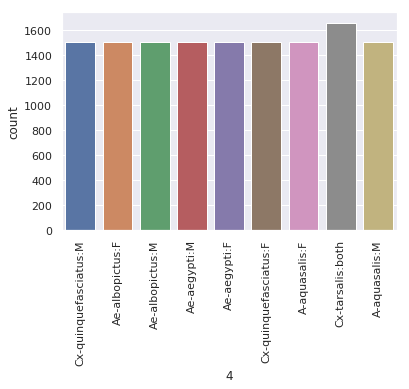

In [7]:
sns.countplot(df["class"].str.split(".", expand=True).iloc[:, -1])
plt.xticks(rotation=90)

## Create arff format

In [8]:
arff.dump('data/mosquitos.arff', df.values,
          relation='mosquitos', names=df.columns)

In [9]:
df.to_csv("data/mosquitos.csv", index=False)

# Instruments

In [10]:
df = read_data("file_instrument.txt")
df.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,mfcc27,mfcc28,mfcc29,mfcc30,class
0,-517.304652,-36.988369,-37.197950,33.781951,16.971196,18.934503,-30.172417,-4.646184,28.622689,-5.119971,-12.617194,24.012243,1.710644,-12.636654,2.209792,-10.988549,38.357600,-27.625749,11.574572,8.862511,13.453244,7.408414,7.608673,2.746275,5.930775,-3.230861,-13.306246,20.232930,-8.171426,1.555775,Instrument.Aerophone.Wood.Clarinet
1,-575.031777,-10.797991,-52.993984,2.029256,7.357598,50.701204,22.829815,-11.645888,-44.334844,23.135417,22.080612,-17.858334,-20.546859,5.434167,-9.924063,19.139743,33.995132,-32.795159,-0.639177,19.535500,13.750700,18.898307,-7.263361,8.616396,-3.516185,13.256706,8.161520,-17.270561,2.820382,0.107735,Instrument.Aerophone.Wood.Clarinet
2,-358.891176,4.889186,-38.847819,-8.029446,-40.994993,-19.276401,-27.270633,7.641633,19.194229,21.602330,-3.519213,-23.858277,-9.238633,10.045339,3.154794,-5.346238,23.240573,10.289583,-16.473526,-6.733759,9.606731,-8.443138,-4.912660,8.405834,-3.520120,12.228741,10.875290,-15.764530,3.806484,-3.164547,Instrument.Aerophone.Wood.Clarinet
3,-579.901541,-32.419937,-66.669336,-0.071422,5.212727,45.820049,10.079688,-11.086254,-19.991938,35.740800,21.199561,-22.514438,-12.370908,6.608449,1.379295,28.165751,7.773646,-34.482122,25.902864,14.951043,6.138026,-2.194189,-13.643205,19.245514,-1.207703,22.425035,-28.763212,9.354104,3.056354,7.856952,Instrument.Aerophone.Wood.Clarinet
4,-381.272870,40.645956,-45.198618,26.041872,-4.823613,14.029999,7.357420,-0.716642,-2.853773,-15.868602,-22.419601,-25.353380,-21.123256,-2.741042,-1.659321,-6.767241,-20.196788,-17.131803,-14.655412,-6.755504,2.290454,26.482838,30.821246,3.925666,-0.585921,-0.009981,4.508829,13.008012,7.243075,-2.485803,Instrument.Aerophone.Wood.Clarinet


In [11]:
df.describe()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,mfcc22,mfcc23,mfcc24,mfcc25,mfcc26,mfcc27,mfcc28,mfcc29,mfcc30
count,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000
mean,-443.449454,67.040728,-21.225166,4.921104,-5.500639,-1.239704,-5.533772,-5.059702,-5.256820,-1.892083,-3.086579,-0.649589,-1.680385,-0.013755,-0.726243,0.578594,-0.487709,0.251265,0.465144,-0.222965,-0.394749,0.714986,-0.076337,0.731416,1.018887,0.275015,0.138908,1.100776,0.452022,0.604207
std,133.321966,68.642638,33.824445,16.548039,16.028629,14.510831,14.260372,14.001394,14.140584,15.764658,15.455896,15.502420,14.824255,14.152638,13.894978,14.528452,16.048875,16.147129,15.549048,13.836256,11.951297,11.441329,10.632230,10.364382,10.192693,11.025938,11.568485,10.955137,8.801434,7.008364
min,-899.941120,-272.473208,-132.382566,-82.954470,-61.213171,-55.196568,-59.676804,-53.269015,-63.088325,-72.248853,-52.290742,-48.609353,-52.214358,-44.320048,-46.144825,-45.838260,-49.908425,-52.458202,-50.887936,-50.561945,-40.608719,-39.354850,-42.345345,-40.189237,-35.634618,-46.382068,-39.252977,-38.107253,-25.389817,-27.810307
25%,-540.230517,17.897917,-44.995646,-6.242990,-16.411079,-11.028014,-14.497264,-13.692999,-13.434397,-11.218619,-11.983222,-9.749334,-10.233307,-8.178417,-8.399832,-7.475042,-9.297821,-8.485354,-8.016428,-8.135339,-6.477532,-5.129110,-5.916974,-5.027329,-4.688955,-6.245090,-6.560313,-5.102894,-4.668010,-3.197740
50%,-443.967263,57.704608,-27.755638,4.626613,-6.682558,-2.228417,-6.187116,-6.097205,-6.561279,-3.633359,-4.420518,-2.339834,-3.190905,-2.072072,-2.395080,-0.506870,-2.182727,-1.397563,-0.700879,-1.535286,-0.959983,0.196442,-0.958033,-0.500122,-0.049133,-1.141631,-1.465738,-0.027770,-0.468313,0.050187
75%,-346.763582,118.999293,-1.138133,15.393690,4.742730,7.334383,2.070766,1.695231,0.814561,5.048039,3.517767,5.374181,4.332524,5.302260,4.514119,5.812949,4.713423,6.044369,7.130749,5.773558,4.765564,5.811154,4.609270,5.438296,5.886361,6.591005,6.586099,6.896422,5.777387,4.187418
max,-49.476309,249.557050,98.096736,72.031727,57.187800,63.169549,56.133439,69.418457,64.489429,66.630862,66.361428,67.807883,61.822212,70.585888,61.753613,58.911384,59.016531,58.541479,51.850683,53.084720,50.288029,49.353362,47.110514,45.440534,38.390549,38.769873,42.814338,39.617680,31.303422,30.152517


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

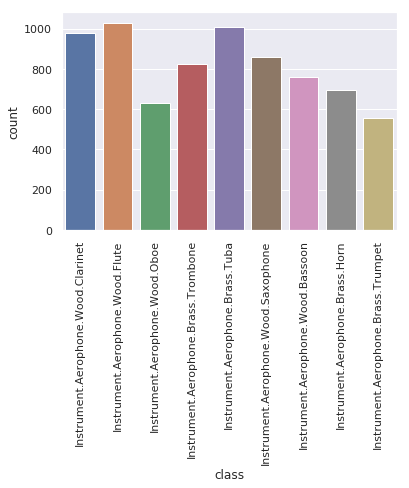

In [12]:
idx = df["class"].str.contains("Instrument.Aerophone")
sns.countplot(df.loc[idx, "class"])
plt.xticks(rotation=90)

Save just the Aerophones

In [35]:
df["class"] = df["class"].str.replace(".", "/")

In [36]:
print("{" + ", ".join(df[idx]["class"].unique()) + "}")

{Instrument/Aerophone/Wood/Clarinet, Instrument/Aerophone/Wood/Flute, Instrument/Aerophone/Wood/Oboe, Instrument/Aerophone/Brass/Trombone, Instrument/Aerophone/Brass/Tuba, Instrument/Aerophone/Wood/Saxophone, Instrument/Aerophone/Wood/Bassoon, Instrument/Aerophone/Brass/Horn, Instrument/Aerophone/Brass/Trumpet}


In [32]:
arff.dump('data/instruments.arff', df[idx].values,
          relation='mosquitos', names=df[idx].columns)

In [38]:
df["class"] = df["class"].str.replace("/", ".")
df[idx].to_csv("data/instruments.csv", index=False)